Titanic Survival Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # for better visuals


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df[["Name", "Age", "Survived"]].head()


,Name,Age,Survived
0,"Braund, Mr. Owen Harris",22.0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1
2,"Heikkinen, Miss. Laina",26.0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1
4,"Allen, Mr. William Henry",35.0,0


In [7]:
df[df['Age']>50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
...,...,...,...,...,...,...,...,...,...,...,...,...
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S


In [8]:
df.sort_values('Age',ascending=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [9]:
df.groupby("Sex")["Survived"].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
df["Age"].fillna(df["Age"].mean(), inplace = True)

/tmp/ipython-input-926507727.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace = True)


In [12]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
df.drop(columns=['Cabin'], inplace=True)

In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

/tmp/ipython-input-3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [15]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [40]:
df.replace({'Sex':{'male':0, 'female':1}, 'Embarked': {'S':0, 'C':1, 'Q':2}}, inplace= True)

/tmp/ipython-input-1174271315.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':0, 'female':1}, 'Embarked': {'S':0, 'C':1, 'Q':2}}, inplace= True)
/tmp/ipython-input-1174271315.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace({'Sex':{'male':0, 'female':1}, 'Embarked': {'S':0, 'C':1, 'Q':2}}, inplace= True)
/tmp/ipython-input-1174271315.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objec

In [41]:
df['Survived'] = df['Survived'].astype("category")

In [42]:
df['Pclass'] = df['Pclass'].astype("category")

In [43]:
df.drop_duplicates(inplace=True)


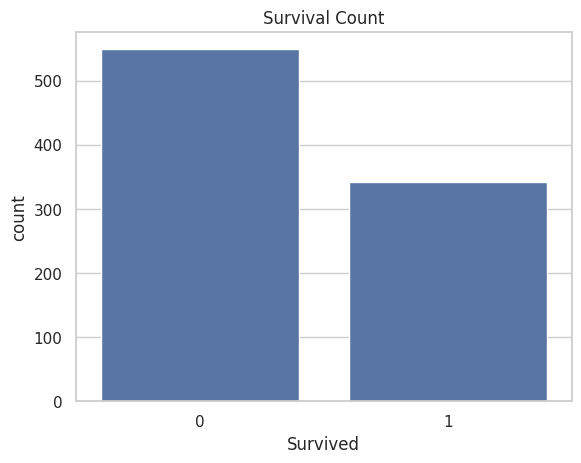

In [44]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()


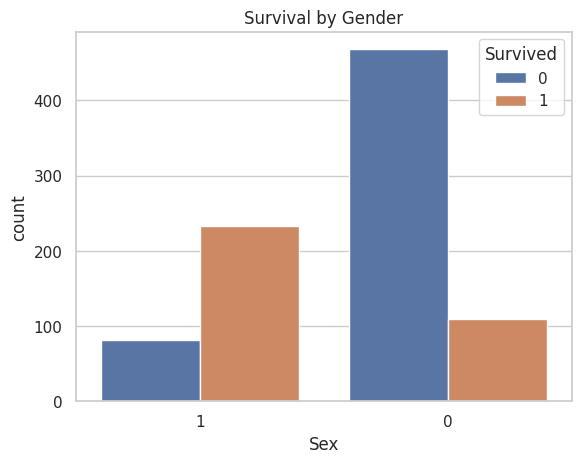

In [45]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()


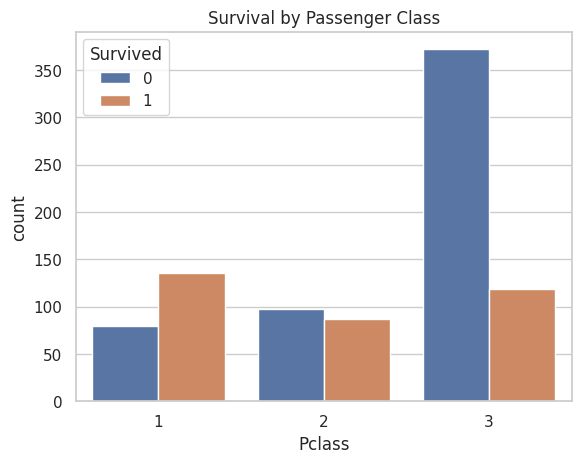

In [46]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()

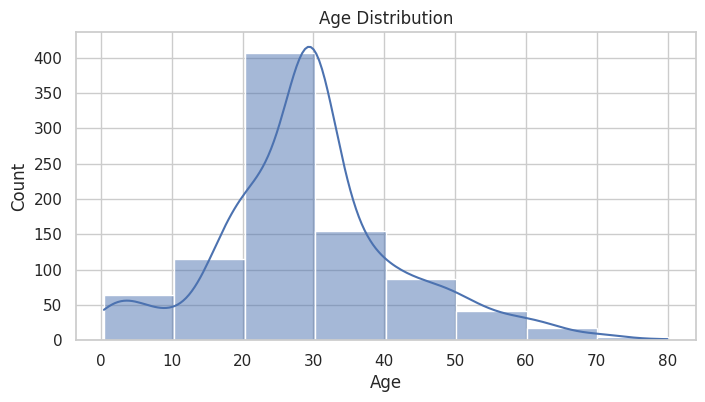

In [47]:
plt.figure(figsize=(8,4))
sns.histplot(df["Age"], bins=8, kde=True)
plt.title("Age Distribution")
plt.show()


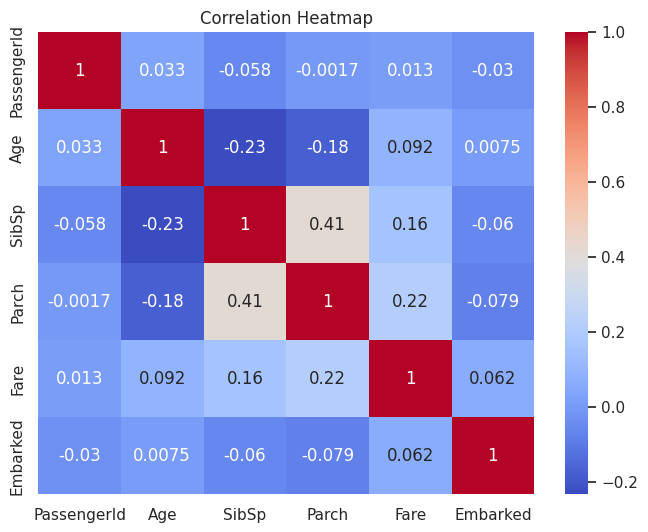

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Average age of survivors vs non-survivors

In [49]:
df.groupby('Survived')['Age'].mean()

/tmp/ipython-input-2339185715.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Survived')['Age'].mean()


,Age
Survived,
0,30.415100
1,28.549778


People survived from each embarkation port

In [50]:
df.groupby('Embarked')['Survived'].count()

,Survived
Embarked,
0,646
1,168
2,77


Box plot of Age vs Pclass

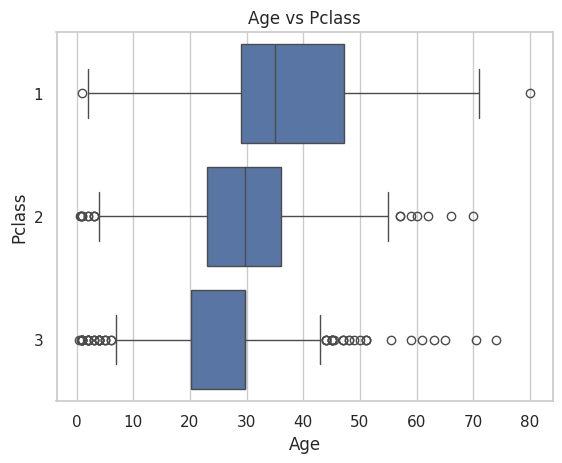

In [51]:
sns.boxplot(x='Age', y='Pclass', data=df)
plt.title('Age vs Pclass')
plt.show()

Visualizing Fare Distribution by Survival

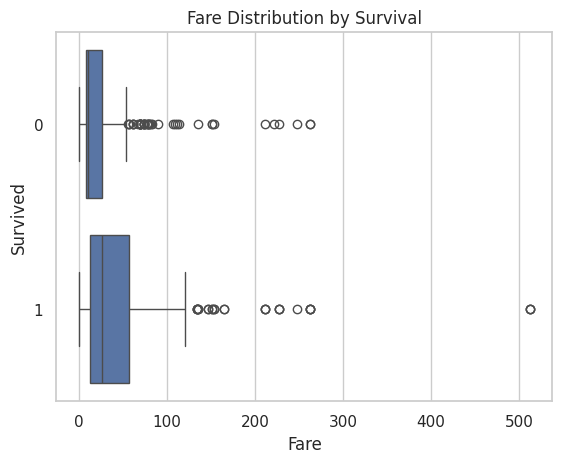

In [52]:
sns.boxplot(x='Fare',y='Survived',data=df)
plt.title('Fare Distribution by Survival')
plt.show()

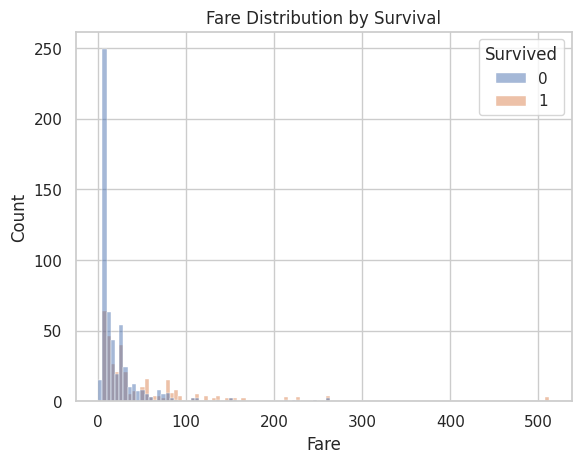

In [53]:
sns.histplot(x='Fare',hue='Survived',data=df)
plt.title('Fare Distribution by Survival')
plt.show()

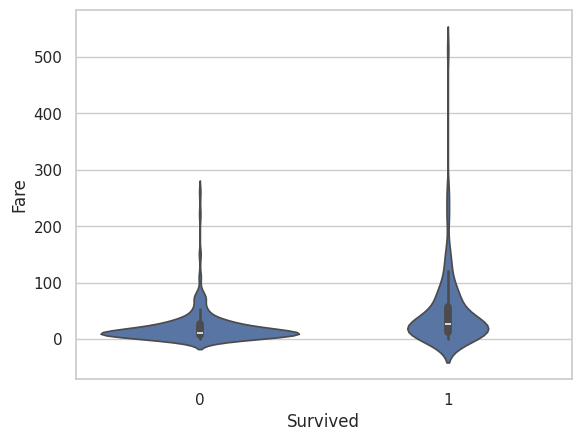

In [54]:
sns.violinplot(x='Survived',y='Fare',data=df)
plt.show()

Choosing features (X) and target (y)

In [55]:
features = ['Pclass','Sex','Age','Fare','Embarked']
x = df[features]
y = df['Survived']

In [56]:
# sklearn tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, ConfusionMatrixDisplay)

Train / test split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


Model Training

In [58]:
model = LogisticRegression()

In [60]:
#Training the model using Logistic Regression
model.fit(X_train,y_train)

LogisticRegression()

Model Evaluation

In [62]:
#Accuracy on training data
X_train_prediction = model.predict(X_train)

In [63]:
print(X_train_prediction)

[0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0
 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0
 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [64]:
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training:',training_data_accuracy )

Accuracy score of training: 0.8033707865168539


In [69]:
#Accuracy on test data
X_test_prediction = model.predict(X_test)

In [70]:
print(X_test_prediction)

[0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1
 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0]


In [71]:
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of testing:',test_data_accuracy )

Accuracy score of testing: 0.776536312849162


In [72]:
classification_report = classification_report(y_test, X_test_prediction)
print(classification_report)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.74      0.65      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, X_test_prediction)
print(cm)

[[94 16]
 [24 45]]


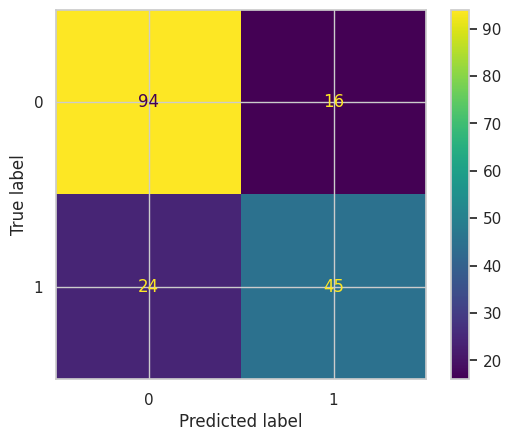

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
